# 🌳 Projeto: Quantificação e Análise Espacial de Áreas Verdes Urbanas  
## Estudo de Caso: Lages – Santa Catarina

Este projeto tem como objetivo quantificar e analisar espacialmente a distribuição de áreas verdes no município de Lages (SC), utilizando técnicas de Geoprocessamento com Python e dados oficiais disponibilizados pelo Instituto Brasileiro de Geografia e Estatística (IBGE).

A análise parte da delimitação territorial oficial do município, obtida a partir das malhas municipais do IBGE (2024), e posteriormente integra informações de uso e cobertura do solo para identificar e mensurar áreas classificadas como vegetação.

A quantificação das áreas verdes urbanas é fundamental para:

- Avaliar a qualidade ambiental urbana  
- Apoiar o planejamento territorial  
- Subsidiar políticas públicas ambientais  
- Analisar equidade na distribuição espacial de infraestrutura verde  
- Relacionar cobertura vegetal com qualidade de vida e saúde pública  

Do ponto de vista metodológico, o projeto envolve:

1. Extração do limite municipal de Lages a partir da malha estadual de Santa Catarina  
2. Reprojeção para sistema de coordenadas métricas  
3. Cálculo da área territorial total  
4. Interseção espacial com dados de uso e cobertura do solo  
5. Cálculo do percentual de cobertura vegetal  
6. Geração de mapas temáticos e indicadores espaciais  

Este notebook documenta de forma reprodutível todo o fluxo de trabalho, garantindo transparência metodológica e replicabilidade da análise.

---


1. Objetivo

Extrair o município de Lages (SC) a partir da malha municipal de Santa Catarina (2024), disponibilizada pelo Instituto Brasileiro de Geografia e Estatística, e calcular sua área total em km².

Esse resultado servirá como base para a análise de cobertura vegetal.

2. Instalação das Bibliotecas 

In [ ]:
# Instale apenas se ainda não tiver
# !pip install geopandas matplotlib


3. Importação das Bibliotecas

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt


4. Carregar a Malha Municipal de Lages- SC correspondente ao ano de 2024

In [2]:
# Caminho para o shapefile
caminho_shp = "SC_Municipios_2024\SC_Municipios_2024.shp"

# Carregar dados
sc_municipios = gpd.read_file(caminho_shp)

# Visualizar primeiras linhas
sc_municipios.head()


<>:2: SyntaxWarning: "\S" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\S"? A raw string is also an option.
<>:2: SyntaxWarning: "\S" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\S"? A raw string is also an option.
C:\Users\Samantha\AppData\Local\Temp\ipykernel_7668\827306715.py:2: SyntaxWarning: "\S" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\S"? A raw string is also an option.
  caminho_shp = "SC_Municipios_2024\SC_Municipios_2024.shp"


,CD_MUN,NM_MUN,CD_RGI,NM_RGI,CD_RGINT,NM_RGINT,CD_UF,NM_UF,SIGLA_UF,CD_REGIA,NM_REGIA,SIGLA_RG,CD_CONCU,NM_CONCU,AREA_KM2,geometry
0,4209508,Laurentino,420022,Rio do Sul,4207,Blumenau,42,Santa Catarina,SC,4,Sul,S,None,None,79.333,"POLYGON ((-49.7267 -27.14486, -49.72657 -27.14..."
1,4202107,Barra Velha,420020,Itajaí,4207,Blumenau,42,Santa Catarina,SC,4,Sul,S,4208203,Itajaí - Balneário Camboriú/SC,138.947,"MULTIPOLYGON (((-48.6184 -26.71031, -48.61851 ..."
2,4217808,Taió,420022,Rio do Sul,4207,Blumenau,42,Santa Catarina,SC,4,Sul,S,None,None,693.847,"POLYGON ((-50.00058 -27.18117, -50.0008 -27.18..."
3,4202156,Belmonte,420009,São Miguel do Oeste,4204,Chapecó,42,Santa Catarina,SC,4,Sul,S,None,None,93.852,"POLYGON ((-53.63351 -26.88613, -53.67158 -26.8..."
4,4204707,Cunha Porã,420012,Maravilha,4204,Chapecó,42,Santa Catarina,SC,4,Sul,S,None,None,220.099,"POLYGON ((-53.11676 -26.88899, -53.11675 -26.8..."


5. Verificar Estrutura dos Dados

In [3]:
sc_municipios.columns


Index(['CD_MUN', 'NM_MUN', 'CD_RGI', 'NM_RGI', 'CD_RGINT', 'NM_RGINT', 'CD_UF',
       'NM_UF', 'SIGLA_UF', 'CD_REGIA', 'NM_REGIA', 'SIGLA_RG', 'CD_CONCU',
       'NM_CONCU', 'AREA_KM2', 'geometry'],
      dtype='object')

6. Filtrar Apenas o Município de Lages

In [5]:
lages = sc_municipios[sc_municipios["NM_MUN"] == "Lages"]

lages


,CD_MUN,NM_MUN,CD_RGI,NM_RGI,CD_RGINT,NM_RGINT,CD_UF,NM_UF,SIGLA_UF,CD_REGIA,NM_REGIA,SIGLA_RG,CD_CONCU,NM_CONCU,AREA_KM2,geometry
68,4209300,Lages,420005,Lages,4203,Lages,42,Santa Catarina,SC,4,Sul,S,4209300,Lages,2637.66,"POLYGON ((-50.18435 -27.93549, -50.18435 -27.9..."


7. Visualizar o Município

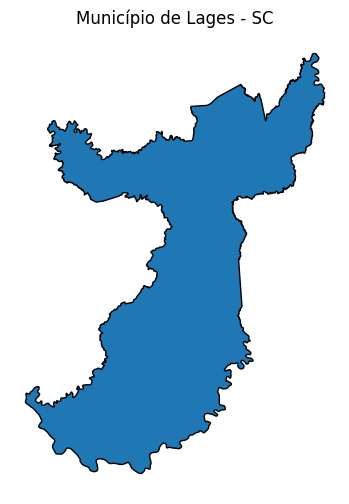

In [6]:
lages.plot(edgecolor="black", figsize=(6,6))
plt.title("Município de Lages - SC")
plt.axis("off")
plt.show()


8. Verificar Sistema de Referência (CRS)

In [7]:
lages.crs


<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

9. Reprojetar para Sistema Métrico (UTM)

In [8]:
lages_metric = lages.to_crs(epsg=31982)

lages_metric.crs


<Projected CRS: EPSG:31982>
Name: SIRGAS 2000 / UTM zone 22S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 54°W and 48°W, northern and southern hemispheres, onshore and offshore. In remainder of South America - between 54°W and 48°W, southern hemisphere, onshore and offshore.
- bounds: (-54.0, -54.18, -47.99, 7.04)
Coordinate Operation:
- name: UTM zone 22S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

10. Calcular Área Total do Município

In [9]:
# Área em metros quadrados
area_m2 = lages_metric.geometry.area.sum()

# Converter para km²
area_km2 = area_m2 / 1_000_000

print(f"Área total de Lages: {area_km2:.2f} km²")


Área total de Lages: 2635.84 km²


In [10]:
print("Resumo da Análise Territorial")
print("-------------------------------")
print(f"Município: Lages - SC")
print(f"Área Total: {area_km2:.2f} km²")
print(f"CRS Utilizado: {lages_metric.crs}")


Resumo da Análise Territorial
-------------------------------
Município: Lages - SC
Área Total: 2635.84 km²
CRS Utilizado: EPSG:31982


Interseção Espacial e Cálculo do Percentual de Cobertura Verde
Município de Lages – SC

Este notebook tem como finalidade:

Integrar o limite municipal de Lages (extraído da malha do Instituto Brasileiro de Geografia e Estatística – 2024)

Intersectar com dados de uso e cobertura do solo

Filtrar classes de vegetação

Calcular a área total de cobertura vegetal

Determinar o percentual de cobertura verde no município

11. Bibliotecas necessárias

In [11]:
# Instalar se necessário
# !pip install geopandas matplotlib contextily


12. Importação das Bibliotecas

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
